In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'/Users/emmaleedolfi/springboard_datascience/Capstone')

In [3]:
tweets = pd.read_excel('NYC_tweets_parkTag.xls', index_col = 'FID')

In [4]:
parkFeature = pd.read_csv('Parks_RandSample.csv', header = None)
parkInfo_full = pd.read_csv('ParkFeatures_joined.csv')

In [5]:
tweets.head()

,FID_1,id_str,owner_name,tweet_text,date_taken,latitude,longitude,FID_2,GISPROPNUM,LOCATION,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,TPL_GIS,MGT,TPL_AREA,TPL_ACRES,Distance
FID,,,,,,,,,,,,,,,,,,,,
0,1607,169212751297000000,JohnMcCarthyyy,Secrets never stay secrets forever,20120214,40.512285,-74.197688,0,R079,Hylan Blvd. from Sharrott Ave. to Seguine Ave.,R,104.545,91 TRENTON COURT,Lemon Creek Park,Waterfront Facility,0,NYC Parks,4.554019e+06,104.545887,0
1,2800,181950950029000000,Firebutterfly11,I'm at Lemon Creek Park (Staten Island New Yo...,20120320,40.512235,-74.197620,0,R079,Hylan Blvd. from Sharrott Ave. to Seguine Ave.,R,104.545,91 TRENTON COURT,Lemon Creek Park,Waterfront Facility,0,NYC Parks,4.554019e+06,104.545887,0
2,3359,188520016072000000,Firebutterfly11,I'm at Lemon Creek Park (Staten Island New Yo...,20120407,40.512235,-74.197620,0,R079,Hylan Blvd. from Sharrott Ave. to Seguine Ave.,R,104.545,91 TRENTON COURT,Lemon Creek Park,Waterfront Facility,0,NYC Parks,4.554019e+06,104.545887,0
3,3360,188520015959000000,Firebutterfly11,I just ousted Eric F. as the mayor of Lemon Cr...,20120407,40.512235,-74.197620,0,R079,Hylan Blvd. from Sharrott Ave. to Seguine Ave.,R,104.545,91 TRENTON COURT,Lemon Creek Park,Waterfront Facility,0,NYC Parks,4.554019e+06,104.545887,0
4,3462,189857125852000000,TiffanyVaglio,I'm at Lemon Creek Park (Staten Island New Yo...,20120410,40.512235,-74.197620,0,R079,Hylan Blvd. from Sharrott Ave. to Seguine Ave.,R,104.545,91 TRENTON COURT,Lemon Creek Park,Waterfront Facility,0,NYC Parks,4.554019e+06,104.545887,0


In [6]:
parks_tweetCount = pd.DataFrame(tweets[['SIGNNAME', 'GISPROPNUM']].groupby('GISPROPNUM').agg('count'))
parks_tweetCount = parks_tweetCount.reset_index()
parks_tweetCount.columns = ['GISPROPNUM','tweet_count']
parks_tweetCount.head()

,GISPROPNUM,tweet_count
0,B019,872
1,B042,59
2,B058,7554
3,B085,81
4,B121,23


In [8]:
parksInfo = pd.merge(parkInfo_full, parks_tweetCount, left_on = 'GISPROPNUM', right_on='GISPROPNUM',how='inner')
parksInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 36 columns):
Unnamed: 0          98 non-null int64
GISPROPNUM          98 non-null object
BOROUGH             98 non-null object
ACRES               98 non-null float64
SIGNNAME            98 non-null object
TYPECATEGO          98 non-null object
handball            98 non-null float64
tennis              98 non-null float64
basketball          98 non-null float64
adult_soft          98 non-null float64
track_and           98 non-null float64
play_area_count     98 non-null float64
preserve_count      98 non-null float64
spray_count         98 non-null float64
OBJECTID            98 non-null int64
TPL_P_NAME          98 non-null object
FREQUENCY           98 non-null int64
SUM_SVCAREA         98 non-null float64
SUM_TOTPOPSVCA      98 non-null int64
SUM_KIDSVCA         98 non-null int64
SUM_YOUNGPROSVCA    98 non-null int64
SUM_SENIORSVCA      98 non-null int64
SUM_HHILOWSVCA      98 non-null int6

In [9]:
print(parksInfo['tweet_count'].describe())
print(parksInfo['total_amenities'].describe())
print(parksInfo['ACRES'].describe())
print(parksInfo['SUM_TOTPOPSVCA'].describe())

count       98.00000
mean       568.55102
std       2435.58974
min          2.00000
25%         22.00000
50%         53.50000
75%        242.75000
max      22373.00000
Name: tweet_count, dtype: float64
count    98.000000
mean      4.642857
std       7.179941
min       0.000000
25%       0.000000
50%       1.500000
75%       7.750000
max      37.000000
Name: total_amenities, dtype: float64
count     98.000000
mean       9.369663
std       43.690915
min        0.000000
25%        0.372802
50%        0.953157
75%        2.845750
max      413.800000
Name: ACRES, dtype: float64
count       98.000000
mean     25762.928571
std      16728.080197
min        108.000000
25%      10935.750000
50%      23501.000000
75%      36580.000000
max      63650.000000
Name: SUM_TOTPOPSVCA, dtype: float64


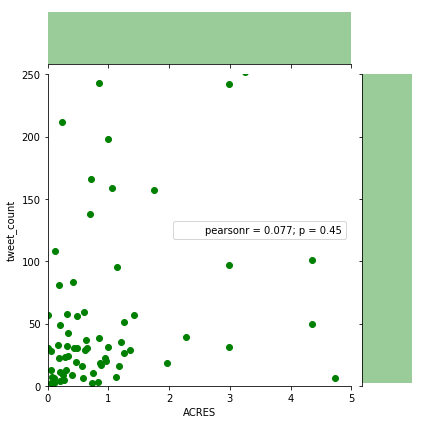

In [10]:
# plot scatter of park size and tweets and find correlation
sns.jointplot('ACRES', 'tweet_count', data = parksInfo,color='g', xlim=(0,5), ylim=(0,250))
plt.show()

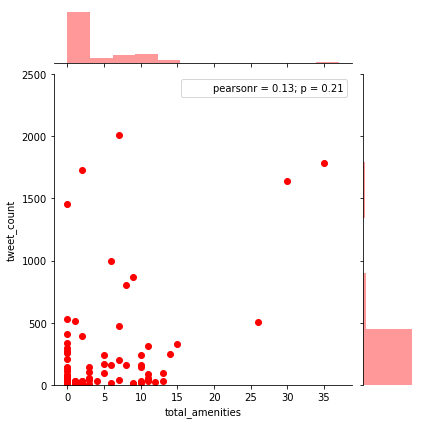

In [11]:
# plot scatter of # of amenities and park usage and find correlation
sns.jointplot('total_amenities', 'tweet_count', color = 'red',ylim = (0,2500), data = parksInfo)
plt.show()

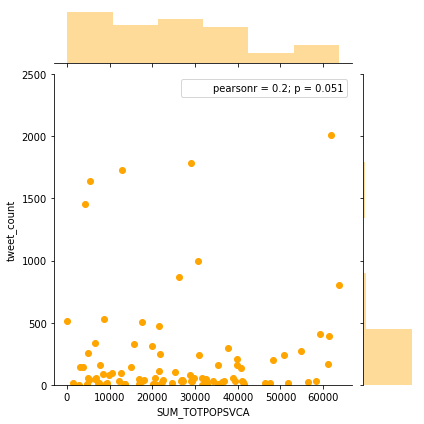

In [12]:
# plot scatter of # of people within a 10MW and park usage and find correlation
sns.jointplot('SUM_TOTPOPSVCA', 'tweet_count', color = 'orange',ylim = (0,2500), data = parksInfo)
plt.show()

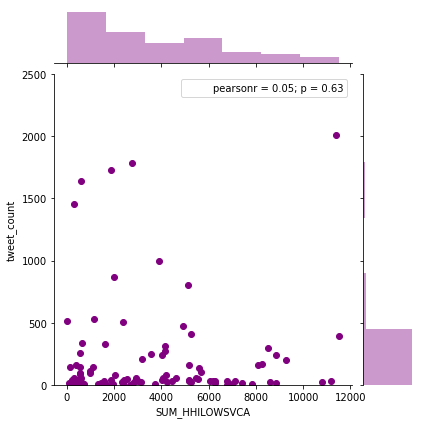

In [13]:
 # plot scatter of # of people within a 10MW and park usage and find correlation
sns.jointplot('SUM_HHILOWSVCA', 'tweet_count', color = 'purple',ylim = (0,2500), data = parksInfo)
plt.show()

In [14]:
# generate permutation samples to compare difference in means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates



In [15]:
# run significance test for mean park usage per year and park size
smallParks = parksInfo.loc[parksInfo.ACRES<1]['tweet_count']
largeParks= parksInfo.loc[parksInfo.ACRES>10]['tweet_count']

# null = park size has no impact on tweets
# alt = larger parks have more tweets

# Compute difference of means from sample: empirical_diff_means
sample_diff_means = diff_of_means(smallParks,largeParks)
print(sample_diff_means)

# Acquire permutation samples
perm_replicates = draw_perm_reps(smallParks, largeParks, diff_of_means, 1000)
print(np.percentile(perm_replicates, [0.5,99.5]))

# Compute and print p-value: p
p = np.sum(perm_replicates >= sample_diff_means) / float(len(perm_replicates))
print('p-value = '+str(p))

-1237.36
[-938.37570909  327.12973636]
p-value = 1.0


In [16]:
# run significance test for mean park usage per year and total # of park amenities

fewAmenities = parksInfo.loc[parksInfo.total_amenities<1]['tweet_count']
manyAmenities= parksInfo.loc[parksInfo.total_amenities>5]['tweet_count']

# null = available amenities does not impact the # of tweets
# alt = parks with more amenities have more tweets

sample_diff_means = diff_of_means(fewAmenities,manyAmenities)
print(sample_diff_means)

# Acquire permutation samples
perm_replicates = draw_perm_reps(fewAmenities, manyAmenities, diff_of_means, 1000)
print(np.percentile(perm_replicates, [0.5,99.5]))

# Compute and print p-value: p
p = np.sum(perm_replicates <= sample_diff_means) / float(len(perm_replicates))
print('p-value = {}'.format(p))

165.98255814
[-1210.96947674   966.0840298 ]
p-value = 0.504


In [17]:
# run significance test for mean park usage per year and total # of park amenities

scarce_pop = parksInfo.loc[parksInfo.SUM_TOTPOPSVCA<11000]['tweet_count']
dense_pop= parksInfo.loc[parksInfo.SUM_TOTPOPSVCA>37000]['tweet_count']

# null = # of people within a 10MW does not have an impact on the # of tweets
# alt = parks with more people living near them will have more tweets

sample_diff_means = diff_of_means(scarce_pop,dense_pop)
print(sample_diff_means)

# Acquire permutation samples
perm_replicates = draw_perm_reps(scarce_pop, dense_pop, diff_of_means, 1000)
print(np.percentile(perm_replicates, [0.5,99.5]))

# Compute and print p-value: p
p = np.sum(perm_replicates >= sample_diff_means) / float(len(perm_replicates))
print('p-value = {}'.format(p))

-1248.21
[-1500.32153333  1419.36878333]
p-value = 0.907


**Not seeing any signficant correlations or p-values between these 3 "predictor" variables. **

# Am I doing anything wrong here....?